<a href="https://colab.research.google.com/github/rahul1990gupta/indic-nlp-datasets/blob/master/examples/Gettinng_started_with_processing_hindi_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Set up the required libraries 
! pip install indic-nlp-datasets==0.1.2

In [2]:
from idatasets import load_devdas

devdas = load_devdas()
# devdas.data is a generator of paragraphs
paragraphs = list(devdas.data)
text = " ".join(paragraphs)
words = text.split(" ")

In [4]:
# Let's print the most common words 
from collections import Counter 
cnt = Counter(words)

cnt.most_common(10)

[('के', 696),
 ('ने', 676),
 ('नही', 672),
 ('से', 626),
 ('मे', 562),
 ('की', 480),
 ('है', 444),
 ('देवदास', 437),
 ('को', 336),
 ('पार्वती', 332)]

In [7]:
# Let's remove the stop words before printing most common words 
from spacy.lang.hi import Hindi

nlp = Hindi()

doc = nlp(text)

not_stop_words = []
for token in doc:
  if token.is_stop:
    continue
  if token.is_punct or token.text =="|":
    continue 
  not_stop_words.append(token.text)


not_stop_cnt = Counter(not_stop_words)

not_stop_cnt.most_common(10)

[('नही', 782),
 ('देवदास', 472),
 ('कहा-', 390),
 ('पार्वती', 345),
 ('क्या', 237),
 ('दिन', 187),
 ('बात', 168),
 ('तुम', 168),
 ('मै', 160),
 ('चन्द्रमुखी', 154)]

In [18]:
# Let's render this in wordcloud 
# first import the rquired libraries 
from wordcloud import WordCloud
from spacy.lang.hi import STOP_WORDS as STOP_WORS_HI
import matplotlib.pyplot as plt

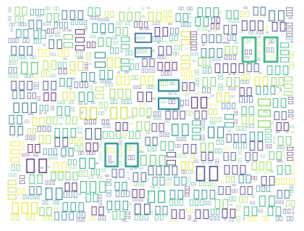

In [19]:
wordcloud = WordCloud(
    width=400,
    height=300,
    max_font_size=50, 
    max_words=1000,
    background_color="white", 
    stopwords=STOP_WORDS_HI,
).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [20]:
# That doesn't look right. We need to provide a custom font file to render it correctly. 
# the issue is highlighted here: https://github.com/amueller/word_cloud/issues/70
import requests
url = "https://hindityping.info/download/assets/Hindi-Fonts-Unicode/gargi.ttf"

r = requests.get(url, allow_redirects=True)
font_path="gargi.ttf"

with open(font_path, "wb") as fw:
  fw.write(r.content)




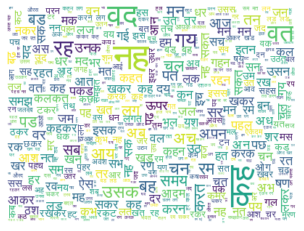

In [21]:
wordcloud = WordCloud(
    width=400,
    height=300,
    max_font_size=50, 
    max_words=1000,
    background_color="white", 
    stopwords=STOP_WORDS_HI,
    font_path=font_path
).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

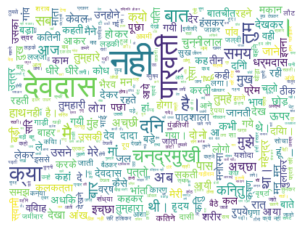

In [22]:
wordcloud = WordCloud(
    width=400,
    height=300,
    max_font_size=50, 
    max_words=1000,
    background_color="white", 
    stopwords=STOP_WORDS_HI,
    regexp=r"[\u0900-\u097F]+", 
    font_path=font_path
).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
